# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Store the dataset into the Dataframe


In [2]:
data=pd.read_csv(r'/content/dataset.csv')

### Check the shape of the dataframe


In [3]:
data.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


### Display All the column names

In [6]:
data.columns.tolist()

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'area_business',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'isOpen']

### Describe the entire dataset

In [7]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
(data.isnull().sum()*100/len(data))

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [10]:
data['invoice_id']

0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: invoice_id, Length: 50000, dtype: float64

In [11]:
data['doc_id']

0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: doc_id, Length: 50000, dtype: float64

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [12]:
(data['baseline_create_date']==data['document_create_date']).sum()

15963

In [13]:
(data['baseline_create_date']==data['document_create_date.1']).sum()

44452

In [14]:
(data['document_create_date']==data['document_create_date.1']).sum()

21232

#### Please check, Column 'posting_id' is constant columns or not


In [15]:
data['posting_id'].nunique(dropna=True)          #constant column

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [16]:
data['isOpen'].nunique(dropna=True)        #not a constant column

2

In [17]:
data['isOpen'].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [18]:
data.drop(['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],axis=1,inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   doc_id                50000 non-null  float64
 6   posting_date          50000 non-null  object 
 7   due_in_date           50000 non-null  float64
 8   invoice_currency      50000 non-null  object 
 9   total_open_amount     50000 non-null  float64
 10  baseline_create_date  50000 non-null  float64
 11  cust_payment_terms    50000 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.6+ MB


In [20]:
data.shape

(50000, 12)

### Show all the Duplicate rows from the dataframe

In [21]:
data[data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [22]:
len(data[data.duplicated()])

1161

### Drop all the Duplicate Rows

In [23]:
data.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [24]:
len(data[data.duplicated()])

0

### Check for the number of Rows and Columns in your dataset

In [25]:
data.shape

(48839, 12)

### Find out the total count of null values in each columns

In [26]:
data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [27]:
data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [28]:
#already checked above

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [29]:
data['clear_date']=pd.to_datetime(data['clear_date'])
data['posting_date']=pd.to_datetime(data['posting_date'])


data['due_in_date'] = pd.to_datetime(data['due_in_date'].astype('str'), format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'].astype('str'), format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [30]:
data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

In [31]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [32]:
data['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [33]:
data['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

In [34]:
data['total_open_amount'].value_counts()

1897.50     101
471.56       96
1898.20      95
943.12       63
1328.25      57
           ... 
2612.50       1
4893.21       1
585.91        1
20493.12      1
1790.30       1
Name: total_open_amount, Length: 44349, dtype: int64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [35]:
data['converted_usd']=data['total_open_amount']
data.loc[data['invoice_currency'] == 'CAD','converted_usd']=0.7*data['total_open_amount']

### Display the new "converted_usd" column values

In [36]:
data['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "business_year" column for this 

In [37]:
data['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [38]:
data.drop(['invoice_currency','total_open_amount'],axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [39]:
data.shape

(48839, 11)

In [40]:
data.columns.tolist()

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'due_in_date',
 'baseline_create_date',
 'cust_payment_terms',
 'converted_usd']

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [41]:
data.columns[data.isnull().any()]

Index(['clear_date'], dtype='object')

#### Find out the number of null values from the column that you got from the above code

In [42]:
data['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [43]:
maindata=data[data['clear_date'].notnull()]
nulldata=data[data['clear_date'].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [44]:
maindata.shape

(39158, 11)

In [45]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [46]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [47]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [48]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [50]:
avgdelay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [51]:
maindata['avg_delay']=maindata['name_customer'].map(avgdelay)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,8 days 02:10:54.545454545
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-3 days +19:33:27.692307693
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,71 days 10:40:00


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [53]:
maindata['avg_delay']=round(pd.to_timedelta(maindata['avg_delay']).dt.total_seconds())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Display the maindata dataframe 

In [54]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-233470.0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1641600.0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,699055.0
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-188792.0
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6172800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-33300.0
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-213591.0
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,90514.0
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,135403.0


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [55]:
maindata.drop(['Delay','clear_date'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [56]:
x=maindata.drop(['avg_delay'],axis=1)
y=maindata['avg_delay']

In [57]:
x

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_loc_test,y_train,y_loc_test=train_test_split(x, y, test_size=0.4, train_size=0.6, random_state=42, shuffle=True)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [60]:
x_train.shape

(23494, 10)

In [61]:
x_loc_test.shape

(15664, 10)

In [62]:
y_train.shape

(23494,)

In [63]:
y_loc_test.shape

(15664,)

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [66]:
x_test,x_val,y_test,y_val = train_test_split(x_loc_test, y_loc_test, train_size=0.5, test_size=0.5, random_state=42, shuffle=True)

### Please check for the number of rows and columns of all the 4 dataframes 

In [67]:
x_test.shape

(7832, 10)

In [68]:
y_test.shape

(7832,)

In [69]:
x_val.shape

(7832, 10)

In [70]:
y_val.shape

(7832,)

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

(array([5.0000e+00, 1.0000e+01, 2.3000e+01, 3.0480e+03, 3.5171e+04,
        1.9400e+02, 6.2500e+02, 6.5000e+01, 1.0000e+01, 7.0000e+00]),
 array([-7689600., -5857920., -4026240., -2194560.,  -362880.,  1468800.,
         3300480.,  5132160.,  6963840.,  8795520., 10627200.]),
 <a list of 10 Patch objects>)

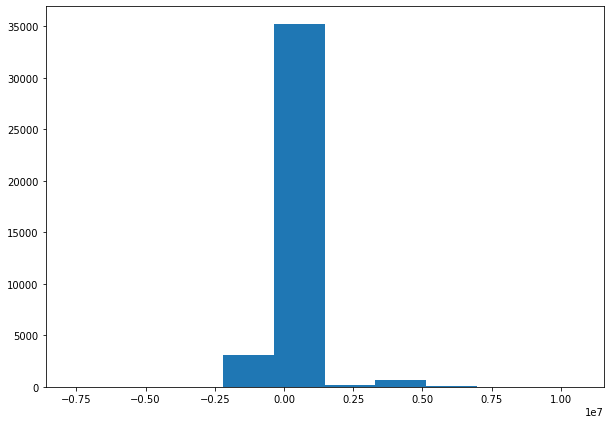

In [71]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


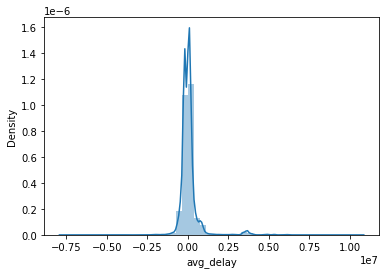

In [72]:
sns.distplot(y)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [73]:
data1=x_train.groupby(['name_customer'], as_index=False)['doc_id'].count()

In [74]:
data1

,name_customer,doc_id
0,11078 us,1
1,17135 llc,1
2,99 CE,1
3,99 CE associates,1
4,99 CE co,1
...,...,...
3070,YEN BROS co,1
3071,YEN BROS corporation,2
3072,YEN BROS llc,1
3073,ZARCO co,1


### You can make another distribution plot of the "doc_id" column from x_train

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


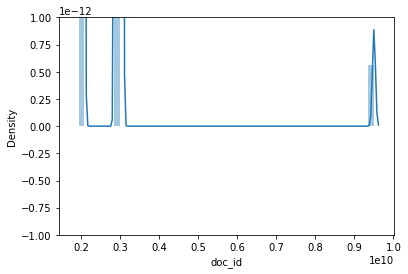

In [75]:
sns.distplot(x_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


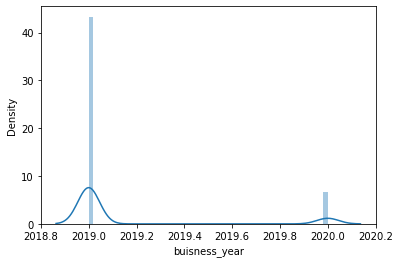

In [76]:
sns.distplot(x_train['buisness_year'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


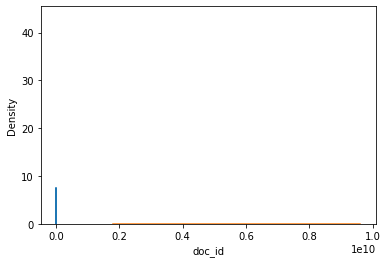

In [77]:
sns.distplot(x_train['buisness_year'])
sns.distplot(x_train['doc_id'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [78]:
x_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
44556,U001,0200756072,REINHA corp,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAA8,54315.10
36713,U001,0200776463,KROGE corp,2020.0,1.930432e+09,2020-01-23,2020-02-07,2020-01-23,NAA8,52725.92
2639,U001,0200794332,COST systems,2019.0,1.928699e+09,2019-01-30,2019-02-14,2019-01-30,NAAX,21126.47
49682,U001,0200780383,MEIJ foundation,2020.0,1.930341e+09,2019-12-31,2020-01-15,2019-12-31,NAA8,143649.72
45201,U001,0200769623,WAL-MAR foundation,2019.0,1.929881e+09,2019-09-17,2019-10-02,2019-09-17,NAH4,14864.00
...,...,...,...,...,...,...,...,...,...,...
7745,U013,0140103699,L&E IN,2019.0,1.991835e+09,2019-11-15,2019-12-15,2019-11-15,NAVE,20131.46
14076,U001,0200900909,SYSCO co,2019.0,1.929117e+09,2019-04-12,2019-04-27,2019-04-12,NAA8,2363.61
48693,U001,0200769623,WAL-MAR trust,2020.0,1.930413e+09,2020-01-20,2020-02-04,2020-01-20,NAH4,6663.73
1054,U001,0200764795,SYSCO associates,2019.0,1.929948e+09,2019-10-03,2019-10-18,2019-10-03,NAA8,3010.12


In [79]:
x_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.134077,2.011913e+09,30618.192289
std,0.340742,2.852458e+08,36500.609654
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929174e+09,4569.665750
50%,2019.000000,1.929732e+09,16795.265000
75%,2019.000000,1.930209e+09,45472.520500
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [80]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(x_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [81]:
x_train['business_code_enc'] = business_coder.fit_transform(x_train['business_code'])

In [82]:
x_val['business_code_enc'] = business_coder.transform(x_val['business_code'])
x_test['business_code_enc'] = business_coder.transform(x_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [83]:
x_train[['business_code','business_code_enc']]

,business_code,business_code_enc
44556,U001,1
36713,U001,1
2639,U001,1
49682,U001,1
45201,U001,1
...,...,...
7745,U013,5
14076,U001,1
48693,U001,1
1054,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [84]:
def custom (col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [85]:
x_train,x_val,x_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [86]:
x_train['cust_number'] = x_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_test['cust_number'] = x_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_val['cust_number'] = x_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [87]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [88]:
label_encoder = EncoderExt()
label_encoder.fit(x_train['name_customer'])
x_train['name_customer_enc']=label_encoder.transform(x_train['name_customer'])
x_val['name_customer_enc']=label_encoder.transform(x_val['name_customer'])
x_test['name_customer_enc']=label_encoder.transform(x_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [89]:
x_train ,x_val, x_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [90]:
label_encoder1 = EncoderExt()
label_encoder1.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_enc']=label_encoder1.transform(x_train['cust_payment_terms'])
x_val['cust_payment_terms_enc']=label_encoder1.transform(x_val['cust_payment_terms'])
x_test['cust_payment_terms_enc']=label_encoder1.transform(x_test['cust_payment_terms'])

In [91]:
x_train ,x_val, x_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [92]:
x_train.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [93]:
x_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [94]:
x_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [95]:
x_train['day_of_postingdate'] = x_train['posting_date'].dt.day
x_train['month_of_postingdate'] = x_train['posting_date'].dt.month
x_train['year_of_postingdate'] = x_train['posting_date'].dt.year

x_val['day_of_postingdate'] = x_val['posting_date'].dt.day
x_val['month_of_postingdate'] = x_val['posting_date'].dt.month
x_val['year_of_postingdate'] = x_val['posting_date'].dt.year


x_test['day_of_postingdate'] = x_test['posting_date'].dt.day
x_test['month_of_postingdate'] = x_test['posting_date'].dt.month
x_test['year_of_postingdate'] = x_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [96]:
x_train ,x_val, x_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [97]:
x_train['day_of_Baseline'] = x_train['baseline_create_date'].dt.day
x_train['month_of_Baseline'] = x_train['baseline_create_date'].dt.month
x_train['year_of_Baseline'] = x_train['baseline_create_date'].dt.year

x_val['day_of_Baseline'] = x_val['baseline_create_date'].dt.day
x_val['month_of_Baseline'] = x_val['baseline_create_date'].dt.month
x_val['year_of_Baseline'] = x_val['baseline_create_date'].dt.year


x_test['day_of_Baseline'] = x_test['baseline_create_date'].dt.day
x_test['month_of_Baseline'] = x_test['baseline_create_date'].dt.month
x_test['year_of_Baseline'] = x_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [98]:
x_train,  x_val, x_test=custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [99]:
x_train['day_of_due'] = x_train['due_in_date'].dt.day
x_train['month_of_due'] = x_train['due_in_date'].dt.month
x_train['year_of_due'] = x_train['due_in_date'].dt.year

x_val['day_of_due'] = x_val['due_in_date'].dt.day
x_val['month_of_due'] = x_val['due_in_date'].dt.month
x_val['year_of_due'] = x_val['due_in_date'].dt.year


x_test['day_of_due'] = x_test['due_in_date'].dt.day
x_test['month_of_due'] = x_test['due_in_date'].dt.month
x_test['year_of_due'] = x_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [100]:
x_train,  x_val, x_test=custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [101]:
x_train.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_Baseline             int64
month_of_Baseline           int64
year_of_Baseline            int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [102]:
x_test.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_Baseline             int64
month_of_Baseline           int64
year_of_Baseline            int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [103]:
x_val.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_Baseline             int64
month_of_Baseline           int64
year_of_Baseline            int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [104]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)
len(x_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [105]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [106]:
x_train_T = x_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [107]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [108]:
train=x_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_due',
 'year_of_Baseline',
 'day_of_Baseline',
 'month_of_due',
 'month_of_Baseline',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

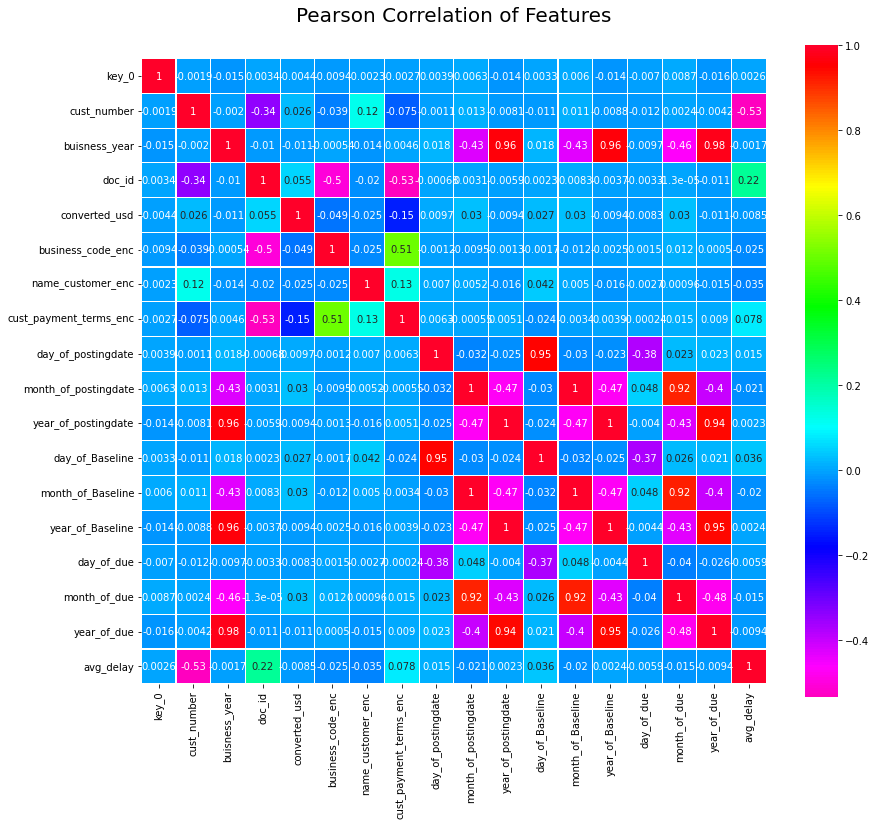

In [109]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [110]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [111]:
sel.variances_

array([1.73096954e+15, 1.16100201e-01, 8.13617218e+16, 1.33223780e+09,
       2.80596482e-01, 1.05187609e+06, 1.23314110e+02, 7.59077911e+01,
       1.23199874e+01, 1.16288980e-01, 7.75034812e+01, 1.23305592e+01,
       1.16501724e-01, 7.61464282e+01, 1.21259307e+01, 1.19305793e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [112]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [113]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
lr = LinearRegression()
lr.fit(x_train, y_train)
predicted= lr.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [114]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=True))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [115]:
predict_test=lr.predict(x_val)
mean_squared_error(y_val, predict_test, squared=True)

320162583205.35785

### Display The Comparison Lists

In [116]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[266197522667.78918],[0.3686478506774924],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [117]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')

In [118]:
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [119]:
predicted= svr.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [120]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=True))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [121]:
predict_test= svr.predict(x_val)
mean_squared_error(y_val, predict_test, squared=True)

477086245719.12115

### Display The Comparison Lists

In [122]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression'],[266197522667.78918, 424809213858.8673],[0.3686478506774924, -0.007538340454489534],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [123]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regression')

In [124]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [125]:
predicted= dtr.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [126]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=True))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [127]:
predict_test= dtr.predict(x_val)
mean_squared_error(y_val, predict_test, squared=True)

238843765003.38138

### Display The Comparison Lists

In [128]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'Decision Tree Regression'],[266197522667.78918, 424809213858.8673, 235324548019.06104],[0.3686478506774924, -0.007538340454489534, 0.4418706166338052],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [129]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regression')

In [130]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [131]:
predicted=rfr.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [132]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=True))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [133]:
predict_test= rfr.predict(x_val)
mean_squared_error(y_val, predict_test, squared=True)

115533201079.85228

### Display The Comparison Lists


In [134]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'Decision Tree Regression', 'Random Forest Regression'],[266197522667.78918, 424809213858.8673, 235324548019.06104, 112902741415.02902],[0.3686478506774924, -0.007538340454489534, 0.4418706166338052, 0.732223697116295],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [135]:
import xgboost as xgb
Algorithm.append('XGB Regressor')

In [136]:
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train, y_train)

[07:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [137]:
predicted = xgbr.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [138]:
MSE_Score.append(mean_squared_error(y_test, predicted,squared=True))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [139]:
predict_test= xgbr.predict(x_val)
mean_squared_error(y_val, predict_test, squared=True)

153011358733.27573

### Display The Comparison Lists


In [140]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'Decision Tree Regression', 'Random Forest Regression', 'XGB Regressor'],[266197522667.78918, 424809213858.8673, 235324548019.06104, 112902741415.02902, 132906725450.56621],[0.3686478506774924, -0.007538340454489534, 0.4418706166338052, 0.732223697116295, 0.6847793851284218],

## You need to make the comparison list into a comparison dataframe 

In [141]:
Scores = pd.DataFrame(list(zip(Algorithm, MSE_Score,R2_Score)), columns = ['Algorithm','MSE_Score','R2_Score'])

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [142]:
np.argmin(MSE_Score)

3

In [143]:
Algorithm[3]

'Random Forest Regression'

In [144]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
predicted_test_final = regressor.predict(x_test)
predicted_val_final = regressor.predict(x_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [145]:
mean_squared_error(y_test,predicted_test_final,squared=True)

110044769194.84703

### Calculate the mean Square Error for validation dataset

In [146]:
mean_squared_error(y_val, predicted_val_final, squared=True)

113515045982.41994

### Calculate the R2 score for test

In [147]:
r2_score(y_test, predicted_test_final)

0.7390020731350972

### Calculate the R2 score for Validation

In [148]:
r2_score(y_val, predicted_val_final)

0.7595246966974855

### Calculate the Accuracy for train Dataset 

In [149]:
train_accuracy=round(regressor.score(x_train,y_train)*100,2)
print(train_accuracy,'%')

96.91 %


### Calculate the accuracy for validation

In [150]:
val_accuracy=round(regressor.score(x_val,y_val)*100,2)
print(val_accuracy,'%')

75.95 %


### Calculate the accuracy for test

In [151]:
test_accuracy=round(regressor.score(x_test,y_test)*100,2)
print(test_accuracy,'%')

73.9 %


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [152]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [153]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [154]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [155]:
nulldata1=nulldata.copy()

In [156]:
nulldata1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [157]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [158]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [159]:
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] =nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

nulldata['day_of_cleardate'] =nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [160]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Check for the datatypes of all the columns of Nulldata

In [161]:
nulldata.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [162]:
nulldata.drop(['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Check the information of the "nulldata" dataframe

In [163]:
nulldata.shape

(9681, 16)

In [164]:
nulldata.describe()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
count,9.681000e+03,9681.0,9.681000e+03,9681.000000,9681.0,9681.000000,9681.000000,9681.0,9681.000000,9681.000000,9681.0,9681.000000,9681.000000,9681.0,9681.000000,9681.000000
mean,1.896688e+08,2020.0,2.006165e+09,32065.681125,65.0,14.988018,3.553972,2020.0,16.011879,4.067452,2020.0,14.767276,3.559860,2020.0,26.306063,1925.692594
std,3.288344e+07,0.0,2.673629e+08,35419.613688,0.0,9.215345,0.733218,0.0,8.282896,0.761615,0.0,9.298942,0.733606,0.0,10.025207,1059.129943
min,1.020000e+02,2020.0,1.930535e+09,0.720000,65.0,1.000000,2.000000,2020.0,1.000000,2.000000,2020.0,1.000000,2.000000,2020.0,0.000000,2.000000
25%,2.007049e+08,2020.0,1.930658e+09,5607.190000,65.0,6.000000,3.000000,2020.0,9.000000,4.000000,2020.0,6.000000,3.000000,2020.0,21.000000,745.000000
50%,2.007623e+08,2020.0,1.930731e+09,19024.190000,65.0,14.000000,3.000000,2020.0,16.000000,4.000000,2020.0,15.000000,3.000000,2020.0,22.000000,2361.000000
75%,2.007696e+08,2020.0,1.930818e+09,47752.640000,65.0,23.000000,4.000000,2020.0,23.000000,5.000000,2020.0,23.000000,4.000000,2020.0,34.000000,2974.000000
max,2.009927e+08,2020.0,2.960636e+09,653644.800000,65.0,31.000000,5.000000,2020.0,31.000000,7.000000,2020.0,31.000000,5.000000,2020.0,65.000000,3056.000000


### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [165]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [166]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 45154 to 13798
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int64  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int64  
 5   name_customer_enc       7832 non-null   int64  
 6   cust_payment_terms_enc  7832 non-null   int64  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_Baseline         7832 non-null   int64  
 11  month_of_Baseline       7832 non-null   int64  
 12  year_of_Baseline        7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nu

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [167]:
x_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_Baseline', 'month_of_Baseline', 'year_of_Baseline',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [168]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [169]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd','business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc','day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate','day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [170]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,65,2694,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,65,2777,21,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,65,96,21,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,65,2008,21,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,65,729,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,65,2979,34,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,65,2977,34,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,65,803,21,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,65,2738,21,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [171]:
final_result=regressor.predict(nulldata2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- day_of_createdate
- month_of_createdate
- year_of_createdate
Feature names seen at fit time, yet now missing:
- day_of_Baseline
- month_of_Baseline
- year_of_Baseline

  warnings.warn(message, FutureWarning)


### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [172]:
final_result = pd.DataFrame(final_result,columns=['avg_delay'])

### Display the "avg_delay" column

In [173]:
final_result['avg_delay']

0       327659.56
1       306848.56
2      -273976.50
3        17821.75
4      -357017.28
          ...    
9676   -200882.39
9677   -202071.83
9678   -626598.37
9679    251031.16
9680    122073.61
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [174]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [175]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,327659.56
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,306848.56
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,-273976.50
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,17821.75
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-357017.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,-200882.39
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,-202071.83
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-626598.37
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,251031.16


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [176]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [177]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [178]:
Final['clear_date']

0      2020-04-13 19:00:59.560
1      2020-04-06 13:14:08.560
2      2020-03-22 19:53:43.500
3      2020-04-30 04:57:01.750
4      2020-04-21 20:49:42.720
                 ...          
9676   2020-03-22 16:11:57.610
9677   2020-05-15 15:52:08.170
9678   2020-03-18 17:56:41.630
9679   2020-04-11 21:43:51.160
9680   2020-05-07 09:54:33.610
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [179]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [180]:
Final['avg_delay']

0       3.0
1       3.0
2      -4.0
3       0.0
4      -5.0
       ... 
9676   -3.0
9677   -3.0
9678   -8.0
9679    2.0
9680    1.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [181]:
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [182]:
Final.drop(['key_0','avg_delay'],axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [183]:
Final['Aging Bucket'].value_counts()

0-15               4957
31-45                65
16-30                31
46-60                 7
Greatar than 60       3
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [184]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-13 19:00:59.560,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-06 13:14:08.560,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-03-22 19:53:43.500,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,NaN
3,U001,0200739534,OK systems,2020-04-30 04:57:01.750,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-21 20:49:42.720,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-22 16:11:57.610,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,NaN
9677,U001,0200769623,WAL-MAR corporation,2020-05-15 15:52:08.170,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,NaN
9678,U001,0200148860,DOLLA co,2020-03-18 17:56:41.630,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-11 21:43:51.160,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


### Store this dataframe into the .csv format

In [185]:
Final.to_csv('Final Dataset.csv', index=False)

# END OF THE PROJECT